In [20]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np

In [21]:
def exponential(l):
    u = random.random()
    return -math.log(u)/l

def poisson(l, k, t,p):
    return ((l*t*p)**k/math.factorial(k))*math.exp(-l*t*p)

def choose_group():
    group_ps = [0.2,0.5,0.3]
    u=random.random()
    if(u<group_ps[0]):
        return 0
    else:
        u=random.random()
        if(u<ratio*scale):
            return 1
        else:
            return 2

In [22]:
ts=[1,10,20,90]

ratio = group_ps[1]/group_ps[2]
scale = 1/(ratio+1)
l=1
N=10000
events = [[list() for p in group_ps]for t in ts]
for i in range(N):
    for j in range(len(ts)):
        t=ts[j]
        curr_t=0
        occurrences = [0]*3
        while(True):
            step = exponential(l)
            curr_t+=step
            if(curr_t>t):
                break
            group = choose_group()
            occurrences[group]+=1
        for k in range(len(group_ps)):
            events[j][k].append(occurrences[k])

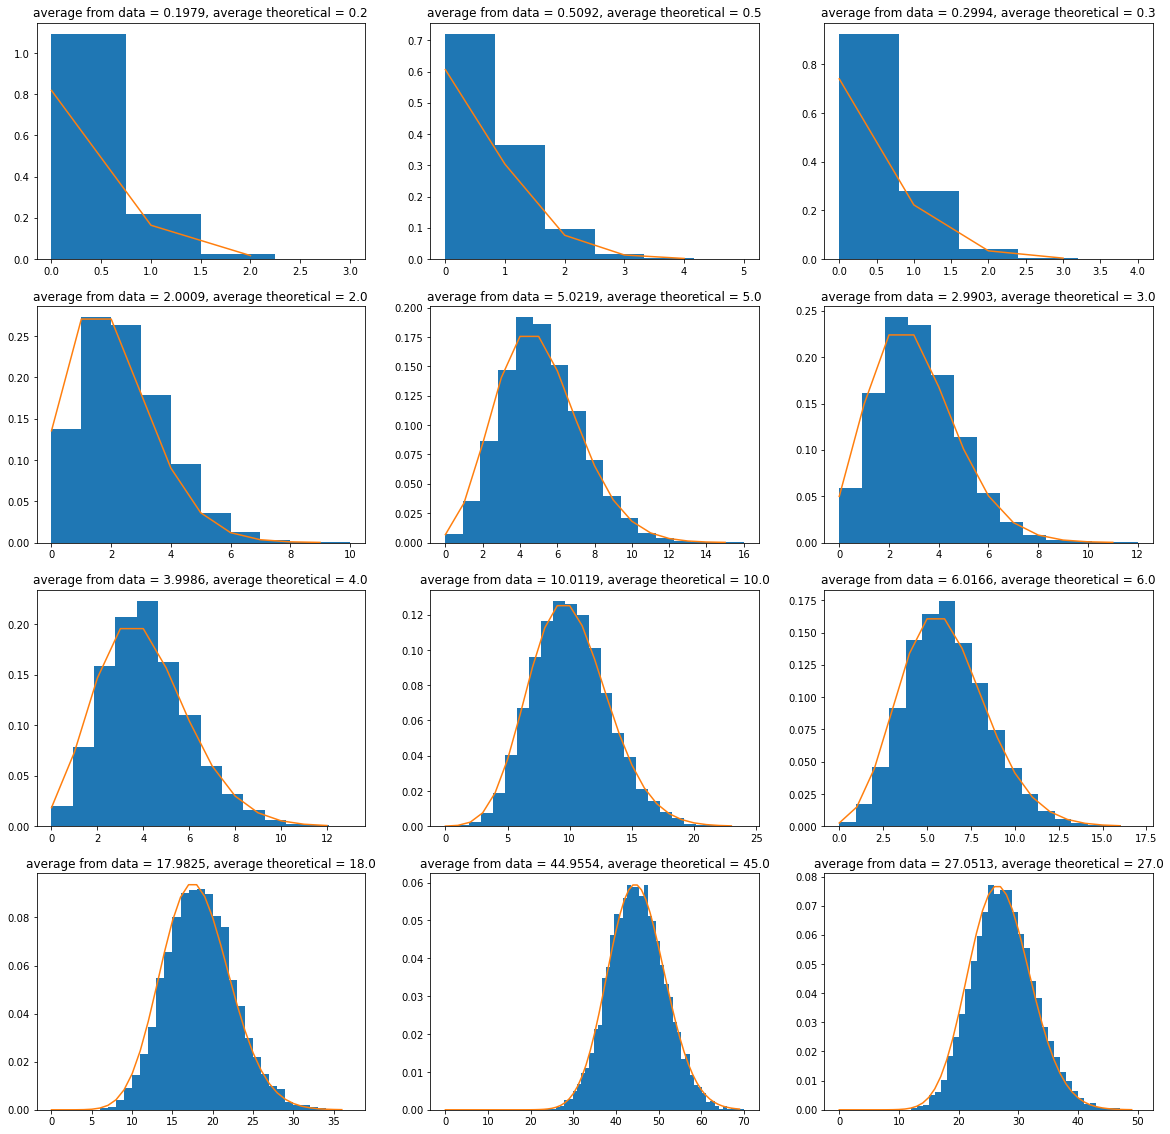

In [26]:
fig,ax = plt.subplots(len(ts),len(group_ps),figsize=(20,20))

for i in range(len(ts)):
    for k in range(len(group_ps)):
        max_occurs = max(events[i][k])
        poisson_data=[list() for p in group_ps]
        for j in range(max_occurs):
            poisson_data[k].append(poisson(l,j,ts[i],group_ps[k]))
        bins = len(set(events[i][k]))
        avg = sum(events[i][k])/len(events[i][k])
        ax[i][k].set_title("average from data = {}, average theoretical = {}".format(avg,l*ts[i]*group_ps[k]))
        ax[i][k].hist(events[i][k],density=True, bins=bins)
        ax[i][k].plot(range(max_occurs),poisson_data[k])